In [1]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#!python -m nltk.downloader stopwords

In [3]:
#!python -m nltk.downloader wordnet

'''
Numpy:   it's used to perform a wide variety of mathematical operations on arrays. It adds powerful data structures to Python 
Pandas:  is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” 
         or “labeled” data both easy and intuitive. 
Seaborn: is an open-source Python library built on top of matplotlib. It is used for data visualization and exploratory data
         analysis. Seaborn works easily with dataframes andthe Pandas library. The graphs created can also be customized easily.       
'''

In [4]:
import keras
from  keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

'''
Keras:     it's Python library for developing and evaluating deep learning models.
Tokenizer: it's class of Keras is used for vectorizing a text corpus. For this either, each text input is converted into
           integer sequence or a vector that has a coefficient for each token in the form of binary values.


'''

# IMDB dataset

In [31]:
df_trainIMDB = pd.read_csv('TrainIMDB.csv')
df_valIMDB = pd.read_csv('ValidIMDB.csv')
df_testIMDB = pd.read_csv('testIMDB.csv')

In [32]:
df_trainIMDB.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


# Preprocessing

In [48]:
def Preprocessing(text):
    text = re.sub(r'[^\w\s]','',text)
    text = text.lower()
    text = [w for w in text.split(' ') if w not in stopwords.words('english')]
    text = [WordNetLemmatizer().lemmatize(token) for token in text]
    text = [WordNetLemmatizer().lemmatize(token,pos='v') for token in text]
    text = " ".join(text)
    return text

df_trainIMDB['text'] = df_trainIMDB.text.apply(lambda x:Preprocessing(x))
df_valIMDB['text'] = df_valIMDB.text.apply(lambda x:Preprocessing(x))
df_testIMDB['text']= df_testIMDB.text.apply(lambda x:Preprocessing(x))

In [50]:
#Split Dataset
trainIMDB_x = df_trainIMDB['text']
validIMDB_x = df_valIMDB['text']
testIMDB_x = df_testIMDB['text']
trainIMDB_y = df_trainIMDB['label']
validIMDB_y = df_valIMDB['label']
testIMDB_y = df_testIMDB['label']

Preparing the Data for modeling 

In [56]:
x= df_trainIMDB['text']

# Tokenizing training data set
tokenizer= Tokenizer(1512, lower=True, oov_token='UNK') #num_words=1512
tokenizer.fit_on_texts(x)

# Convert text to sequences using keras
x_trainIMDB= tokenizer.texts_to_sequences(x)

# Pad sequences to get uniform length
x_trainIMDB_pad= pad_sequences(x_trainIMDB, maxlen=80, padding='post')

# Convert to binary matrix
y_trainIMDB_f= to_categorical(trainIMDB_y)

# Printing first four rows of matrix
y_trainIMDB_f[:4]

## Perform same steps on the val and test detaset
x_valIMDB= df_valIMDB['text']
x_valIMDB_f= tokenizer.texts_to_sequences(x_valIMDB)
x_valIMDB_pad= pad_sequences(x_valIMDB_f, maxlen=80, padding='post')
y_valIMDB_f= to_categorical(validIMDB_y)

x_testIMDB= df_testIMDB['text']
x_testIMDB_f= tokenizer.texts_to_sequences(x_testIMDB)
x_testIMDB_pad= pad_sequences(x_testIMDB_f, maxlen=80, padding='post')
y_testIMDB_f= to_categorical(testIMDB_y)

# twitter dataset

In [5]:
df_train= pd.read_csv('train.txt', header =None, sep =';', names = ['Input','Sentiment'], encoding='utf-8')
df_val= pd.read_csv('val.txt', header =None, sep =';', names = ['Input','Sentiment'], encoding='utf-8')
df_test= pd.read_csv('test.txt', header =None, sep =';', names = ['Input','Sentiment'], encoding='utf-8')

df_test2= pd.read_csv('test30%.txt', header =None, sep =';', names = ['Input','Sentiment'], encoding='utf-8')
df_dataset=pd.read_csv('dataset.txt', header =None, sep =';', names = ['Input','Sentiment'], encoding='utf-8')

In [6]:
df_dataset['Sentiment'].value_counts()

joy         6752
sadness     5789
anger       2706
fear        2370
love        1639
surprise     719
Name: Sentiment, dtype: int64

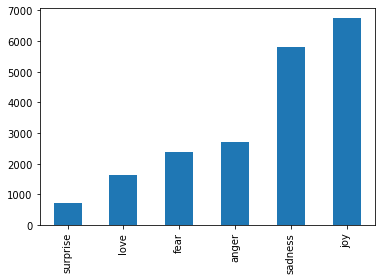

In [7]:
df_dataset['Sentiment'].value_counts().sort_values().plot.bar()
plt.show()

'''
Pandas DataFrames: is an excel like data structure with labeled axes (rows and columns).
Pandas read_csv(): function imports a CSV file to DataFrame format. [header]: this allows you to specify which row will be used                    as column names for your dataframe. Expected an int value or a list of int values. in this model file doesn’t                    have a header, so simply set header=None ,[sep]: Specify a custom delimiter for the CSV input, the default is                    a comma. [name] :  is used to define column names.0

'''

In [8]:
"""
# Words Cloud for each emotion

from wordcloud import WordCloud

def words_cloud(wordcloud, df):
    plt.figure(figsize=(10, 10))
    plt.title(df+' Word Cloud', size = 16)
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");
    
emotions_list = df_dataset['Sentiment'].unique()
for emotion in emotions_list:
    text = ' '.join([sentence for sentence in df_dataset.loc[df_dataset['Sentiment'] == emotion,'Input']])
    wordcloud = WordCloud(width = 600, height = 600).generate(text)
    words_cloud(wordcloud, emotion)
"""


'\n# Words Cloud for each emotion\n\nfrom wordcloud import WordCloud\n\ndef words_cloud(wordcloud, df):\n    plt.figure(figsize=(10, 10))\n    plt.title(df+\' Word Cloud\', size = 16)\n    plt.imshow(wordcloud) \n    # No axis details\n    plt.axis("off");\n    \nemotions_list = df_dataset[\'Sentiment\'].unique()\nfor emotion in emotions_list:\n    text = \' \'.join([sentence for sentence in df_dataset.loc[df_dataset[\'Sentiment\'] == emotion,\'Input\']])\n    wordcloud = WordCloud(width = 600, height = 600).generate(text)\n    words_cloud(wordcloud, emotion)\n'

In [9]:
df_train.head()

,Input,Sentiment
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [10]:
df_train['Sentiment'].value_counts()

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: Sentiment, dtype: int64

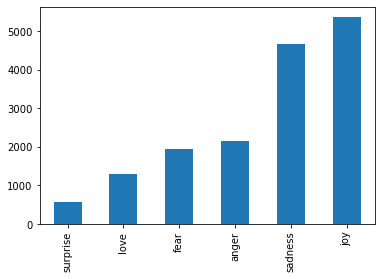

In [11]:
df_train['Sentiment'].value_counts().sort_values().plot.bar()
plt.show()

Training Dataset

In [12]:
x= df_train['Input']

In [13]:
# calculating the length of each message and making into a dataframe
lst=[]
for i in x:
  lst.append(len(i))

In [14]:
df1= pd.DataFrame(lst)
df1.describe()

,0
count,16000.000000
mean,96.845812
std,55.904953
min,7.000000
25%,53.000000
50%,86.000000
75%,129.000000
max,300.000000


'''
pd.DataFrame(lst): pandas.DataFrame¶ ... Two-dimensional, size-mutable, potentially heterogeneous tabular data. Data structure                      also contains labeled axes (rows and columns)

'''

In [15]:
cts=[]
for i in range(7,301):
   ct=0
   for k in lst:
     if k==i:
       ct+=1
   cts.append(ct)

culc the num of element that have same length in the list (range(7,301) )

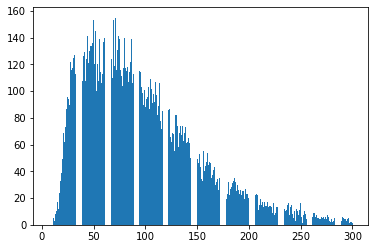

In [16]:
plt.bar(range(7, 301), cts)
plt.show()

In [17]:
# Tokenizing training data set
tokenizer= Tokenizer(1512, lower=True, oov_token='UNK') #num_words=1512
tokenizer.fit_on_texts(x)

Tokenization is a method to segregate a particular text into small chunks or tokens. Here the tokens or chunks can be anything from words to characters, even subwords.

oov_token='UNK': Keras lets us define an Out Of Vocab token - this will replace any unknown words with a token of our choosing. This is better than just throwing away unknown words since it tells our model there was information here

tokenizer.fit_on_texts(): is used to update the internal vocabulary for the texts list. We need to call be before using other methods of texts_to_sequences or texts_to_matrix.The object returned by fit_on_texts can be used to derive more information by using the following attributes-(word_counts,word_docs ,word_index,document_count)


# X_train  where X is the actual input (x= df_train['Input'])

In [18]:
# Convert text to sequences using keras
x_train= tokenizer.texts_to_sequences(x)

texts_to_sequences: method helps in converting tokens of text corpus into a sequence of integers.

In [19]:
# Pad sequences to get uniform length
x_train_pad= pad_sequences(x_train, maxlen=80, padding='post')

pad_sequences(): is used to ensure that all sequences in a list have the same length. By default this is done by padding 0 in the beginning of each sequence until each sequence has the same length as the longest sequence

# y_train where y is our label (df_train['Sentiment'])

In [20]:
# Replace the sentiments with numbers in JSON format
df_train['Sentiment']= df_train.Sentiment.replace({'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5})

In [21]:
y_train= df_train['Sentiment'].values
print(y_train[:4])

[3 3 1 2]


In [22]:
# Convert to binary matrix
y_train_f= to_categorical(y_train)

In [23]:
# Printing first four rows of matrix
y_train_f[:4]

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]], dtype=float32)

Validation dataset


In [24]:
# Perform same steps as training data set
x_val= df_val['Input']

In [25]:
y_val= df_val.Sentiment.replace({'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5})

In [26]:
x_val_f= tokenizer.texts_to_sequences(x_val)

In [27]:
x_val_pad= pad_sequences(x_val_f, maxlen=80, padding='post')

In [28]:
y_val_f= to_categorical(y_val)

# Training the model using LSTM

In [29]:
from keras.models import Sequential
from keras.layers import LSTM,Bidirectional,Dense,Embedding,Dropout

In [48]:
# Instantiating the keras model to be Sequential
model= Sequential()

# Adding first hidden layer
model.add(Embedding(15212, 64, input_length=80)) #input_dim=15212, output_dim=64

# Dropout technique to prevent overfitting
model.add(Dropout(0.6))

# Creating LSTM layer
model.add(Bidirectional(LSTM(80, return_sequences= True))) #units=80 dimensionality of the output space.

model.add(Bidirectional(LSTM(70)))

# Adding final hidden layer
model.add(Dense(6, activation='softmax')) #6 is output units, use 2 in IMDB dataset

# Printing model summary
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 80, 64)            973568    
                                                                 
 dropout_2 (Dropout)         (None, 80, 64)            0         
                                                                 
 bidirectional_4 (Bidirectio  (None, 80, 160)          92800     
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, 140)              129360    
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 6)                 846       
                                                                 
Total params: 1,196,574
Trainable params: 1,196,574
No

Sequential() :is the easiest way to build a model in Keras. It allows you to build a model layer by layer. We use the 'add()'                  function to add layers to our model.
Embedding()  :it's enables us to convert each word into a fixed length vector of defined size( input_dim : Size of the                         vocabulary ,output_dim : Length of the vector for each word ,input_length : Maximum length of a sequence)

Dropout()    :Simply put, dropout refers to ignoring units (i.e. neurons) during the training phase of certain set of neurons                which is chosen at random.
Dense()      :Dense layer is the regular deeply connected neural network layer.It is most common and frequently used layer.                   Dense does the below operation on the input and return the output, output= activation(dot(input, kernel) + bias)

softmax      : activation function in the output layer of neural network models .. the num of node in output layer should be                  the same of our clusters or class so the softmax culc the probilty for each out node and actvaite the hights                   node 

In [49]:
# Compiling model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Compile() :defines the loss function, the optimizer and the metrics. That's all. It has nothing to do with the weights and you             can compile a model as many times as you want without causing any problem to pretrained weights. You need a compiled             model to train (because training uses the loss function and the optimizer)
نستخدم الاوبتمايزر حتى نقلل من وقت التيريننك ونحصل على مسار اكثر استقامة بالتريينك من المسار المتعرج الي يعرقل عملية التريننك ونستخدم ادم لانها افضل الاوبتمايزشن الكورذمز حاليا حيث تغير الويت خلال ايفري براميتر بايفري ايبوك 

Loss     :The purpose of loss functions is to compute the quantity that a model should seek to minimize during training

In [50]:
# Building and training the model
hist= model.fit(x_train_pad, y_train_f, epochs=24, batch_size=128, validation_data=(x_val_pad, y_val_f)) 

Epoch 1/24
125/125 [==============================] - 49s 359ms/step - loss: 1.4930 - accuracy: 0.4082 - val_loss: 1.1977 - val_accuracy: 0.5620
Epoch 2/24
125/125 [==============================] - 58s 461ms/step - loss: 0.9364 - accuracy: 0.6546 - val_loss: 0.6568 - val_accuracy: 0.7775
Epoch 3/24
125/125 [==============================] - 63s 500ms/step - loss: 0.5829 - accuracy: 0.7973 - val_loss: 0.4728 - val_accuracy: 0.8365
Epoch 4/24
125/125 [==============================] - 64s 512ms/step - loss: 0.4201 - accuracy: 0.8597 - val_loss: 0.3610 - val_accuracy: 0.8755
Epoch 5/24
125/125 [==============================] - 73s 582ms/step - loss: 0.3449 - accuracy: 0.8790 - val_loss: 0.3296 - val_accuracy: 0.8840
Epoch 6/24
125/125 [==============================] - 68s 543ms/step - loss: 0.3121 - accuracy: 0.8898 - val_loss: 0.2996 - val_accuracy: 0.8850
Epoch 7/24
125/125 [==============================] - 69s 548ms/step - loss: 0.2653 - accuracy: 0.9016 - val_loss: 0.2707 - val_ac

model.fit()  :Trains the model for a fixed number of epochs (iterations on a dataset).

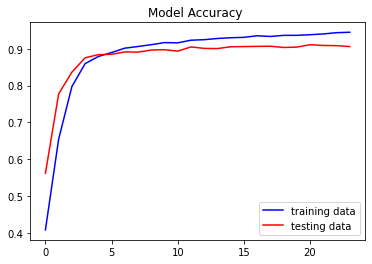

In [62]:
# Plotting accuracy of training vs validation
plt.plot(hist.history['accuracy'], c='b', label='training data')
plt.plot(hist.history['val_accuracy'], c='r', label='testing data')
plt.legend(loc='lower right')
plt.title('Model Accuracy ')
plt.show()

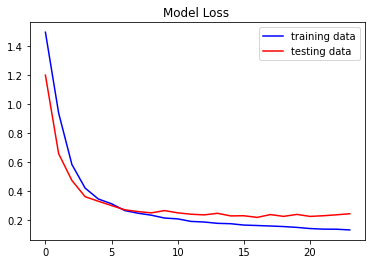

In [63]:
# Plotting loss of training vs validation
plt.plot(hist.history['loss'], c='b', label='training data')
plt.plot(hist.history['val_loss'], c='r', label='testing data')
plt.legend(loc='upper right')
plt.title('Model Loss ')
plt.show()

Test dataset

In [53]:
# Same steps as training/ validation dataset 
x_test= df_test['Input']
x_test2= df_test2['Input']

In [54]:
y_test= df_test.Sentiment.replace({'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5})
y_test2= df_test2.Sentiment.replace({'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5})

In [55]:
x_test_f= tokenizer.texts_to_sequences(x_test)
x_test_f2= tokenizer.texts_to_sequences(x_test2)

In [56]:
x_test_pad= pad_sequences(x_test_f, maxlen=80, padding='post')
x_test_pad2= pad_sequences(x_test_f2, maxlen=80, padding='post')

In [57]:
y_test_f= to_categorical(y_test)
y_test_f2= to_categorical(y_test2)

In [58]:
# Evaluate model
model.evaluate(x_test_pad, y_test_f)

#model.evaluate(x_test_pad2, y_test_f2)

63/63 [==============================] - 3s 41ms/step - loss: 0.2129 - accuracy: 0.9145


[0.2129431515932083, 0.9144999980926514]

evaluate()  :a process during development of the model to check whether the model is best fit for the given problem and                     corresponding data.

**Accuracy on test data is 91.1 %**

In [59]:
# Predict model for test data
#y_pred= model.predict_classes(x_test_pad)
predict_x=model.predict(x_test_pad) 
classes_x=np.argmax(predict_x,axis=1)

# Print precision, recall & f1 score
from sklearn.metrics import classification_report
print("")
print(classification_report(y_test, classes_x))


              precision    recall  f1-score   support

           0       0.92      0.95      0.93       695
           1       0.96      0.86      0.91       275
           2       0.82      0.76      0.79       159
           3       0.96      0.95      0.95       581
           4       0.85      0.92      0.89       224
           5       0.78      0.77      0.78        66

    accuracy                           0.91      2000
   macro avg       0.88      0.87      0.87      2000
weighted avg       0.92      0.91      0.91      2000



predict() :given a trained model, predict the label of a new set of data
argmax()  :Returns the indices of the maximum values along an axis

In [80]:
#Save keras model
from keras.models import save_model
import os.path
if os.path.isfile('my_model') is False :
    model.save('my_model')

# To load the model:
from keras.models import load_model
saved_mdl = load_model("my_model")

INFO:tensorflow:Assets written to: my_model\assets


INFO:tensorflow:Assets written to: my_model\assets


In [81]:
# Evaluate saved model
saved_mdl.evaluate(x_test_pad, y_test_f)

63/63 [==============================] - 14s 80ms/step - loss: 0.1965 - accuracy: 0.9130


[0.19648684561252594, 0.9129999876022339]

In [82]:
# Printing saved model summary
print(saved_mdl.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 80, 64)            973568    
                                                                 
 dropout_1 (Dropout)         (None, 80, 64)            0         
                                                                 
 bidirectional_2 (Bidirectio  (None, 80, 160)          92800     
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 320)              410880    
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 6)                 1926      
                                                                 
Total params: 1,479,174
Trainable params: 1,479,174
No

In [83]:
# Predict using the savid model 
predict_x=saved_mdl.predict(x_test_pad, verbose=0)
classes_x=np.argmax(predict_x,axis=1)
print(classes_x)

[3 3 3 ... 0 0 4]


In [84]:
# Test your sentence
INPUT='The weather looks nice today '
x_ = np.array([INPUT])
# Convert text to sequences using keras
x_input = tokenizer.texts_to_sequences(x_)
# Pad sequences to get uniform length
x_input_pad= pad_sequences(x_input, maxlen=80, padding='post')

predict_input=saved_mdl([x_input_pad])
classes_=np.argmax(predict_input,axis=1)
#print(classes_x)

categories = ['joy','anger','love','sadness','fear','surprise']
print(categories[int(classes_)])

joy


In [47]:

# predict crisp classes for test set
yhat_classes = np.argmax(saved_mdl.predict(x_test_pad, verbose=0),axis=1)


# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes,average=None)
print('precision ', end=' ')
print(precision)

# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes,average=None)
print('Recall: ' , end='')
print(recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes, average="macro")
print( 'F1 score: ',end='')
print(f1)

# Print precision, recall & f1 score
from sklearn.metrics import classification_report
print("")
print(classification_report(y_test, classes_x))

NameError: name 'saved_mdl' is not defined